<a href="https://colab.research.google.com/github/ronmaccms/DE_Team/blob/main/migrationData-penguinstest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Classification using Scikitlearn
The palmer penguin dataset is excellent for EDA and Classification. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

# Data and libraries

In [73]:
# standard packaging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [74]:
# load the dataset from GitHub - original source
# penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

url = "https://raw.githubusercontent.com/ronmaccms/DE_Team/main/migrAItion_database_v3%20-%20Sheet1-NOSPACES.csv"
penguins = pd.read_csv(url, nrows=5)
# penguins = pd.read_csv(url, delimiter='\t')

# Data Inspection

In [75]:
#inspect data
penguins.info()
print(penguins)
# penguins.columns = penguins.columns.str.strip(',').str.strip()
print(penguins.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   venezuela             5 non-null      object
 1   external_immigration  5 non-null      int64 
 2   gni                   5 non-null      object
 3   asylum_seekers        5 non-null      int64 
 4   refugees              5 non-null      int64 
 5   visa_free             5 non-null      object
 6   native_language       5 non-null      object
dtypes: int64(3), object(4)
memory usage: 408.0+ bytes
  venezuela  external_immigration     gni  asylum_seekers  refugees visa_free  \
0  colombia               1780486   6,500           28785      1297       yes   
1      peru                941889   6,740          531822      4098        no   
2     chile                523553  15,360            4714        22        no   
3        us                505647  76,770          246745     18735    

In [76]:


print(penguins["gni"].unique())
print(penguins["external_immigration"].unique())

['6,500' '6,740' '15,360' '76,770' '6,300']
[1780486  941889  523553  505647  388861]


In [77]:
penguins_clean = penguins.dropna(how = "any")
penguins_clean.info()
penguins_clean.reset_index(inplace=True, drop = True)
penguins_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   venezuela             5 non-null      object
 1   external_immigration  5 non-null      int64 
 2   gni                   5 non-null      object
 3   asylum_seekers        5 non-null      int64 
 4   refugees              5 non-null      int64 
 5   visa_free             5 non-null      object
 6   native_language       5 non-null      object
dtypes: int64(3), object(4)
memory usage: 408.0+ bytes


,venezuela,external_immigration,gni,asylum_seekers,refugees,visa_free,native_language
0,colombia,1780486,"6,500",28785,1297,yes,yes
1,peru,941889,"6,740",531822,4098,no,yes
2,chile,523553,"15,360",4714,22,no,yes
3,us,505647,"76,770",246745,18735,no,no
4,ecuador,388861,"6,300",4255,798,yes,yes


*italicized text*#Exploratory Data Analysis (EDA)

Text(48.375, 0.5, 'culmen length')

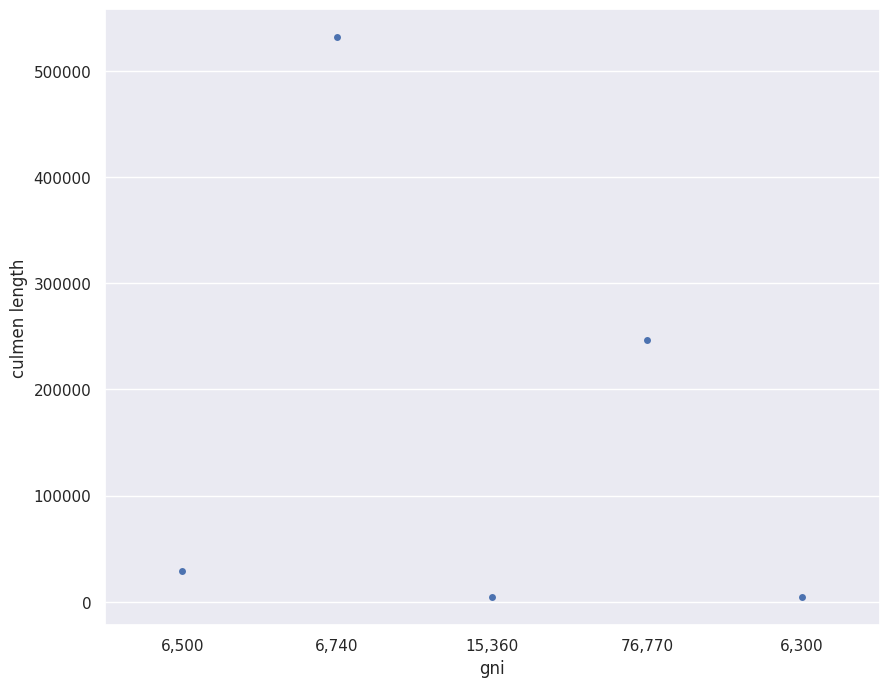

In [78]:
sns.swarmplot(x = "gni", y = "asylum_seekers", data = penguins_clean)
plt.ylabel("culmen length")

Text(58.125, 0.5, 'flipper length')

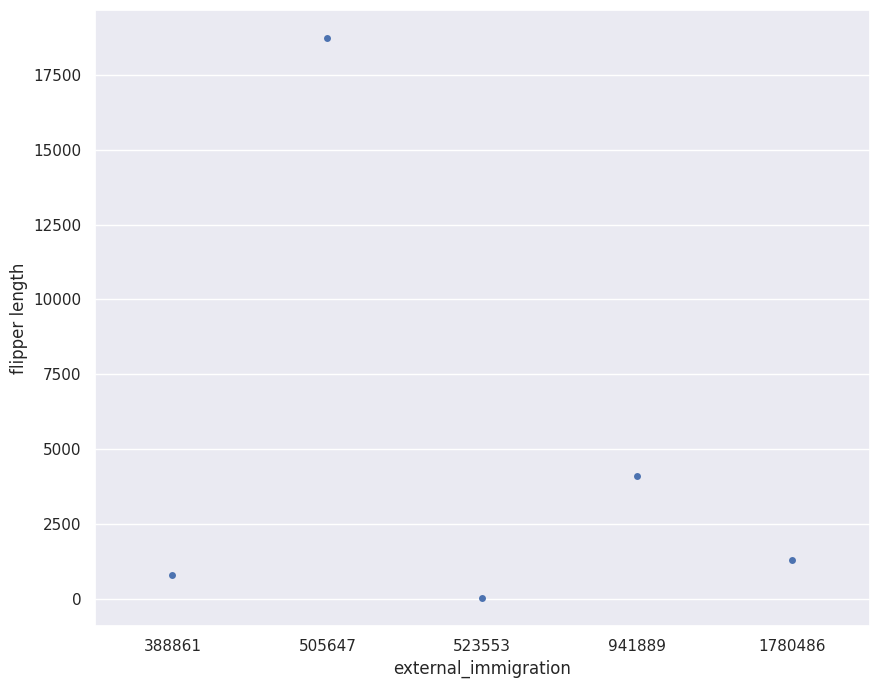

In [79]:
sns.swarmplot(x= "external_immigration", y = "refugees", data = penguins_clean)
plt.ylabel("flipper length")

<Axes: xlabel='refugees', ylabel='gni'>

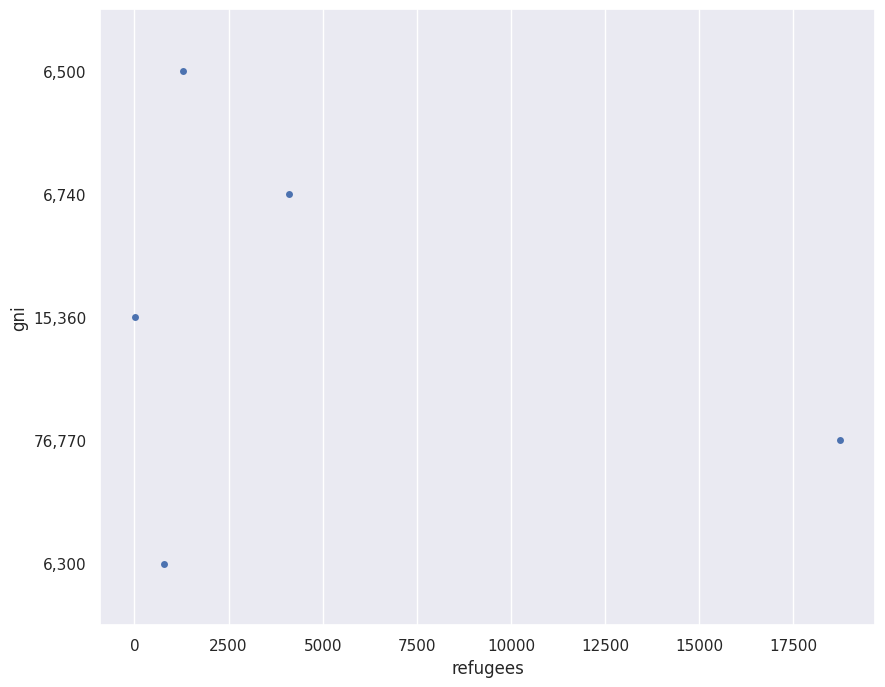

In [80]:
sns.swarmplot(x= "refugees", y = "gni", data = penguins_clean)


<Axes: xlabel='gni', ylabel='external_immigration'>

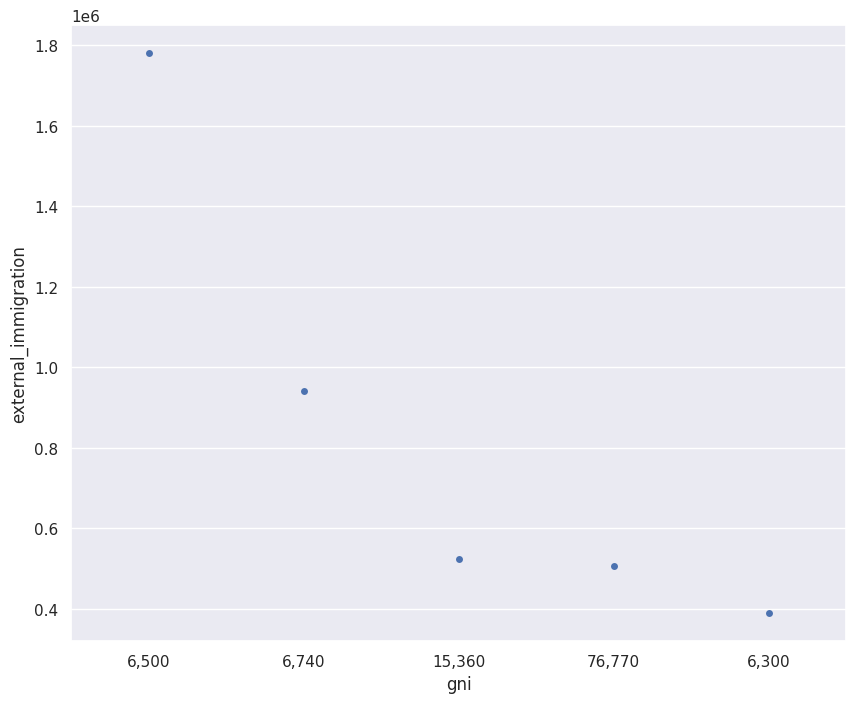

In [81]:
sns.swarmplot(x= "gni", y = "external_immigration", data = penguins_clean)


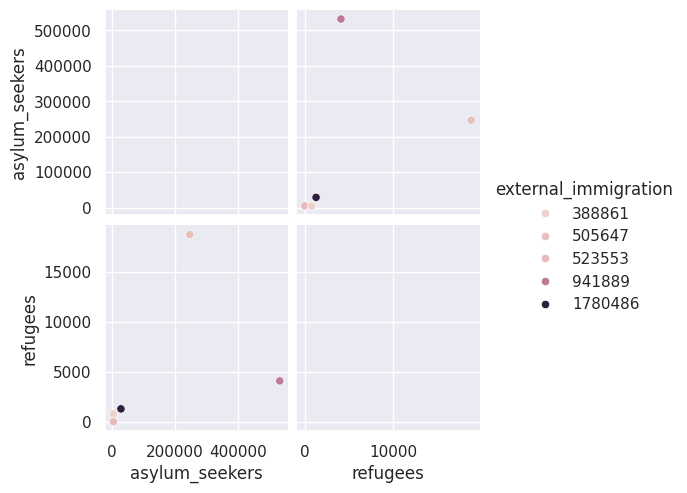

In [82]:
sns.pairplot(penguins_clean, hue='external_immigration')

In [89]:
penguins_num = penguins_clean[["visa_free", "gni", "asylum_seekers","refugees"]]
sns.heatmap(penguins_num.corr())

ValueError: could not convert string to float: 'yes'

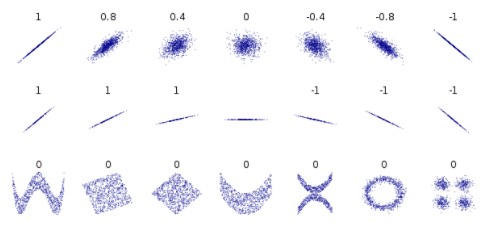

Adelie has smaller culmen length than the other two species
Gentoo has larger flipper length than the other two species
Gentoo are also heavier than the other two species
Adelie are the only penguins living on the three islands, chinstrap only on Dream and Gentoo only on Biscoe

Flipper length and body mass  positevly correlated length features > bigger animal, need for stronger flippers and larger beak to eat more

#Data prep

encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

penguins_clean["sex"] = encoder.fit_transform(penguins_clean["sex"])
penguins_clean["island"] = encoder.fit_transform(penguins_clean["island"])
penguins_clean["species_short"] = encoder.fit_transform(penguins_clean["species_short"])
penguins_clean

<ipython-input-12-d3978d629eae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean["sex"] = encoder.fit_transform(penguins_clean["sex"])
<ipython-input-12-d3978d629eae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean["island"] = encoder.fit_transform(penguins_clean["island"])
<ipython-input-12-d3978d629eae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
3,0,2,36.7,19.3,193.0,3450.0,1
4,0,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
329,2,0,47.2,13.7,214.0,4925.0,1
330,2,0,46.8,14.3,215.0,4850.0,1
331,2,0,50.4,15.7,222.0,5750.0,2
332,2,0,45.2,14.8,212.0,5200.0,1


scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = penguins_clean.loc[:,"island":"sex"]
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.89260388, -0.89765322,  0.78348666, -1.42952144, -0.57122888,
         0.98823488],
       [ 1.89260388, -0.82429023,  0.12189602, -1.07240838, -0.50901123,
        -0.98823488],
       [ 1.89260388, -0.67756427,  0.42724555, -0.42960487, -1.19340546,
        -0.98823488],
       ...,
       [-0.91063202,  1.17485108, -0.74326098,  1.49880565,  1.91747742,
         0.98823488],
       [-0.91063202,  0.22113229, -1.20128527,  0.78457953,  1.23308319,
        -0.98823488],
       [-0.91063202,  1.08314735, -0.53969463,  0.85600214,  1.48195382,
         0.98823488]])

In [ ]:
import numpy as np
y = np.asarray(penguins_clean["species_short"])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)


(267, 6)
(67, 6)


#Train model

In [ ]:
# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

Logistic Regression

In [ ]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)



[0.98148148 1.         1.         1.         0.98113208]


In [ ]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

1.0


In [ ]:
target_names_penguins = encoder.inverse_transform(list(set(y_test)))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names_penguins))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
print(target_names_penguins)
!pip install -qq -U mlxtend

['Adelie' 'Chinstrap' 'Gentoo']
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.3 MB/s eta 0:00:00


(<Figure size 1000x800 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

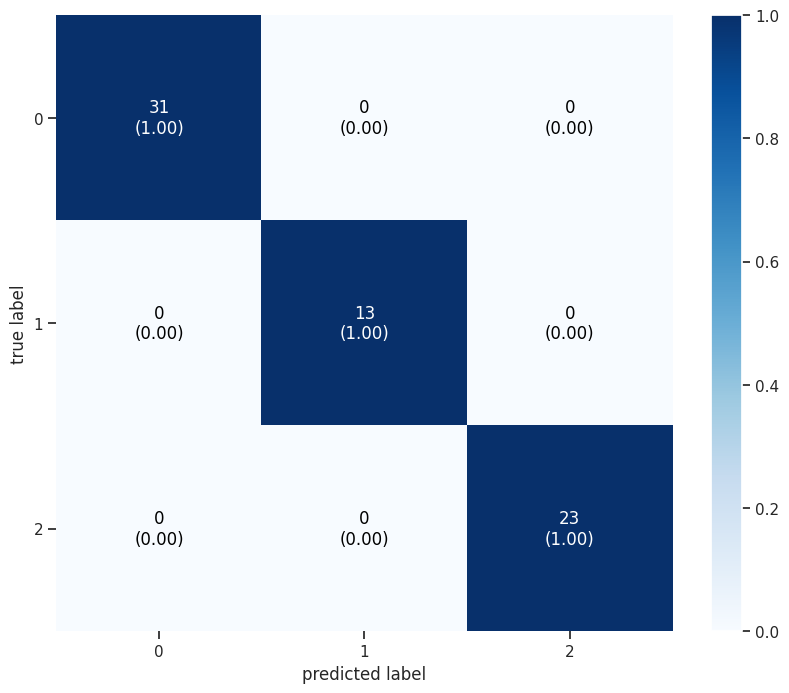

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

confmatrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=confmatrix,colorbar=True,show_absolute=True,show_normed=True,hide_spines = True) #class_names= target_names_penguins    for some reason class_names throws an error

XG boost

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.98148148 1.         0.98113208 0.98113208 0.98113208]
1.0


In [ ]:
# Performance evaluation using the classification_report
y_pred = model.predict(X_test) # predict from the testset
print(classification_report(y_test, y_pred, target_names=target_names_penguins)) #Print out the report

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



(<Figure size 1000x800 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

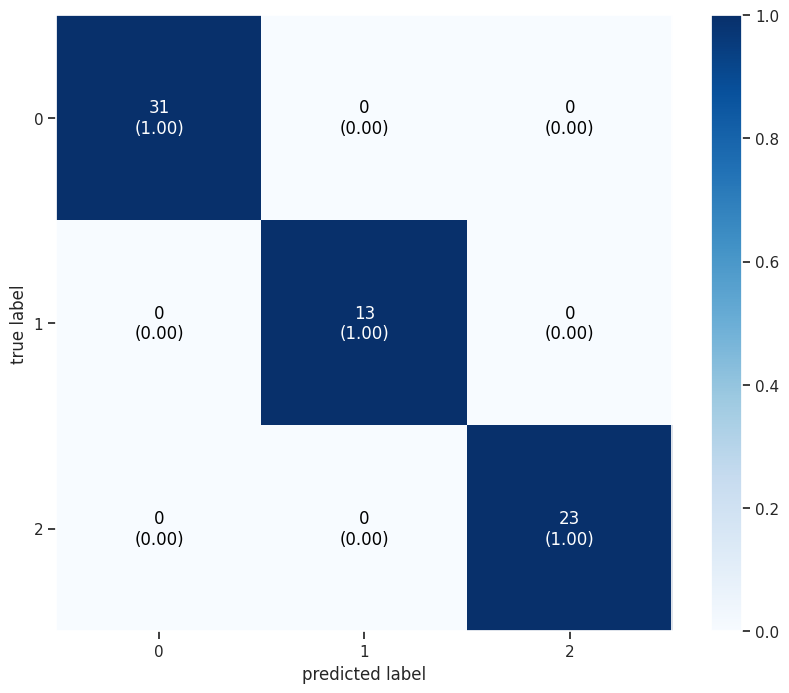

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred)

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)